In [61]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime

In [52]:
# Definir a função logística ajustada com parâmetro adicional b
def logistic_function(x, L, k, x0, b):
    return L / (1 + b * np.exp(-k * (x - x0)))

In [53]:
# Carregar o conjunto de dados
# Substitua 'seu_arquivo.csv' pelo caminho para seu arquivo CSV
data = pd.read_csv('pesos.csv')
display(data)

,data,peso
0,2024-02-07,6.50
1,2024-02-28,8.50
2,2024-03-08,9.70
3,2024-03-13,10.50
4,2024-04-13,13.15
5,2024-05-04,15.55
6,2024-05-31,17.80
7,2024-06-08,18.30


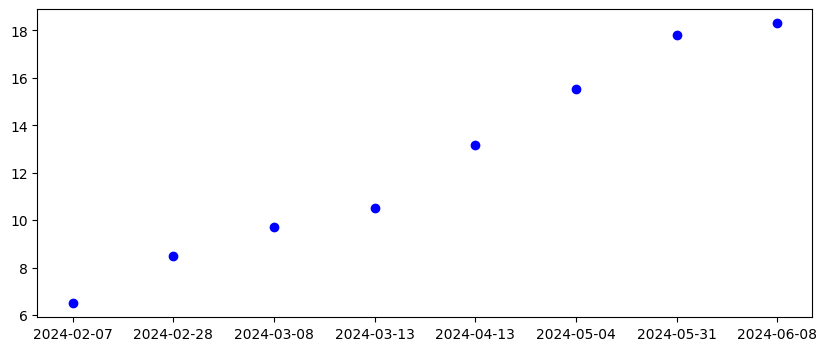

In [54]:
plt.figure(figsize=(10, 4))
plt.scatter(data['data'], data['peso'], label='Dados Originais', color='blue')

In [55]:
# Certificar-se de que a coluna 'data' é do tipo datetime
data['data'] = pd.to_datetime(data['data'])

# Converter a coluna de data para dias desde a primeira data
data['dias'] = (data['data'] - data['data'].min()).dt.days

# Dados de entrada para o ajuste
x_data = data['dias']
y_data = data['peso']

## Significado de cada parâmetro:

### L (Valor Máximo):

- Descrição: Este parâmetro representa o valor máximo que a função logística pode alcançar.
- Significado Prático: Seria o valor máximo possível do peso. É o nível assintótico superior da curva logística.

### k (Taxa de Crescimento):

- Descrição: Este parâmetro controla a taxa de crescimento da curva logística.
- Significado Prático: Determina a rapidez com que o peso aumenta em relação ao tempo (dias). Um valor maior de k resulta em um crescimento mais rápido.
​
### x0 (Ponto Médio):

- Descrição: Este parâmetro indica o valor de x no ponto de inflexão da curva logística, onde a taxa de crescimento é máxima.
- Significado Prático: Representa o dia em que o crescimento do peso é mais rápido. Antes desse ponto, o crescimento acelera; depois, o crescimento desacelera.

### b (Fator Multiplicativo da Exponencial):

- Descrição: Este parâmetro multiplica o termo exponencial e ajusta a curvatura da função logística.
- Significado Prático: O valor de b ajusta a inclinação da curva. Ele afeta como a função decresce em direção ao valor mínimo. Um valor maior de b faz com que a transição entre os valores mínimo e máximo seja mais abrupta.

In [56]:
# Parâmetros iniciais para o ajuste: L, k, x0, b
initial_params = [max(y_data), 1, np.median(x_data), 1]

# Ajustar a função logística aos dados
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_params)

# Aplicar a função logística ajustada aos dados
data['peso_logistic'] = logistic_function(x_data, *params)

# Exibir os primeiros registros do DataFrame
display(data)


c:\Users\willi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,data,peso,dias,peso_logistic
0,2024-02-07,6.50,0,6.621766
1,2024-02-28,8.50,21,8.652974
2,2024-03-08,9.70,30,9.592212
3,2024-03-13,10.50,35,10.125285
4,2024-04-13,13.15,66,13.448575
5,2024-05-04,15.55,87,15.523157
6,2024-05-31,17.80,114,17.749910
7,2024-06-08,18.30,122,18.299379


In [57]:
# Parâmetros ajustados
L, k, x0, b = params
print(f'Parâmetros ajustados: \nL = {L:.2f} kg,\nk = {k:.2f} dia^(-1),\nx0 = {x0:.2f} dia,\nb = {b:.2f}')

Parâmetros ajustados: 
L = 22.47 kg,
k = 0.02 dia^(-1),
x0 = 137.84 dia,
b = 0.17


### Plotar o modelo logístico otimizado aos dados.

In [58]:
x = np.linspace(0, 400, 1000)
y_model = logistic_function(x, L, k, x0, b)

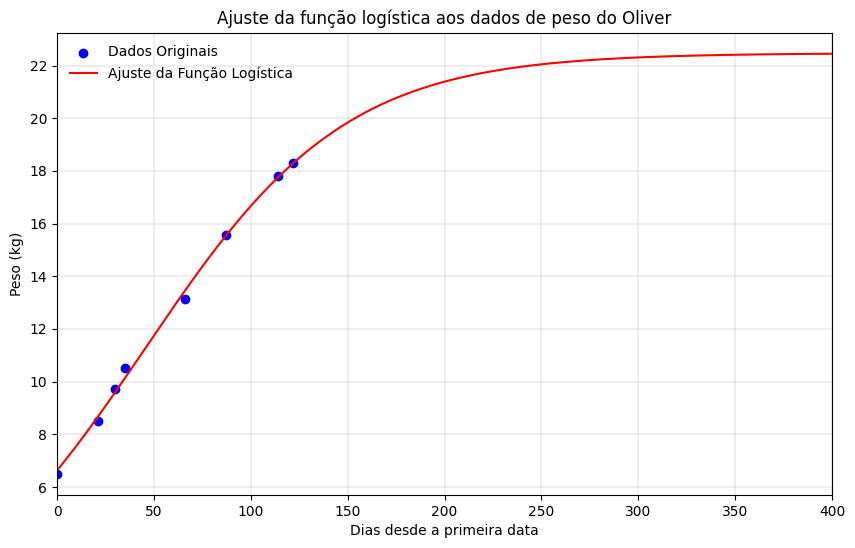

In [69]:
# Plotar os dados e modelo
plt.figure(figsize=(10, 6))
plt.scatter(data['dias'], data['peso'], label='Dados Originais', color='blue')
plt.plot(x, y_model, label='Ajuste da Função Logística', color='red')
plt.xlim([0,x[-1]])
plt.xlabel('Dias desde a primeira data')
plt.ylabel('Peso (kg)')
plt.title('Ajuste da função logística aos dados de peso do Oliver')
plt.legend(frameon = False)
plt.grid(True,which='both', axis='both', linestyle='-', linewidth=0.3)
plt.savefig('peso_Oliver_' + datetime.now().strftime('%Y-'+'%m'+'-%d') + '.png')
plt.show()

In [68]:
print(datetime.now().strftime('%Y-'+'%m'+'-%d'))

2024-06-09
